In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler 
import numpy as np
from sklearn.model_selection import train_test_split
import os, cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D

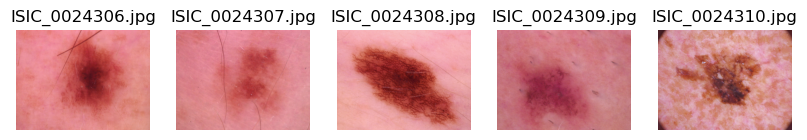

In [23]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Define the directory path
directory_path = r"C:\Users\yeshwanth\Downloads\datafinal\dataverse_files\HAM10000_images_part_1"

# List all files in the directory
image_files = [f for f in os.listdir(directory_path) if f.endswith('.jpg')]

# Select a few sample image files to display
sample_images = image_files[:5]  # Display the first 5 images, change the range if needed

# Plot the images
plt.figure(figsize=(10, 10))

for idx, image_name in enumerate(sample_images):
    image_path = os.path.join(directory_path, image_name)
    
    # Open the image
    image = Image.open(image_path)
    
    # Display the image
    plt.subplot(1, len(sample_images), idx + 1)
    plt.imshow(image)
    plt.axis('off')  # Hide the axes
    plt.title(image_name)

plt.show()

In [24]:
import pandas as pd
data = pd.read_csv('hmnist_28_28_RGB.csv')
data.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [25]:
y = data['label']
x = data.drop(columns = ['label'])

In [26]:
tabular_data = pd.read_csv('HAM10000_metadata.csv')
tabular_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [27]:
classes = {4: ('nv', ' melanocytic nevi'), 6: ('mel', 'melanoma'), 2 :('bkl', 'benign keratosis-like lesions'), 1:('bcc' , ' basal cell carcinoma'), 5: ('vasc', ' pyogenic granulomas and hemorrhage'), 0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),  3: ('df', 'dermatofibroma')}

Text(0.5, 1.0, 'Frequency Distribution of Classes')

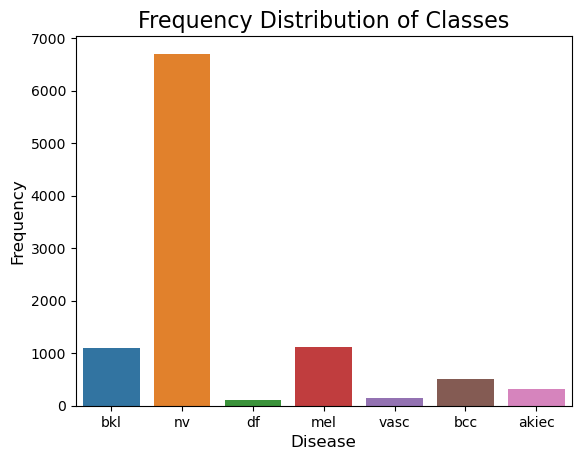

In [28]:
sns.countplot(x = 'dx', data = tabular_data)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency', size=12)
plt.title('Frequency Distribution of Classes', size=16)

Text(0.5, 1.0, 'Gender of Patient')

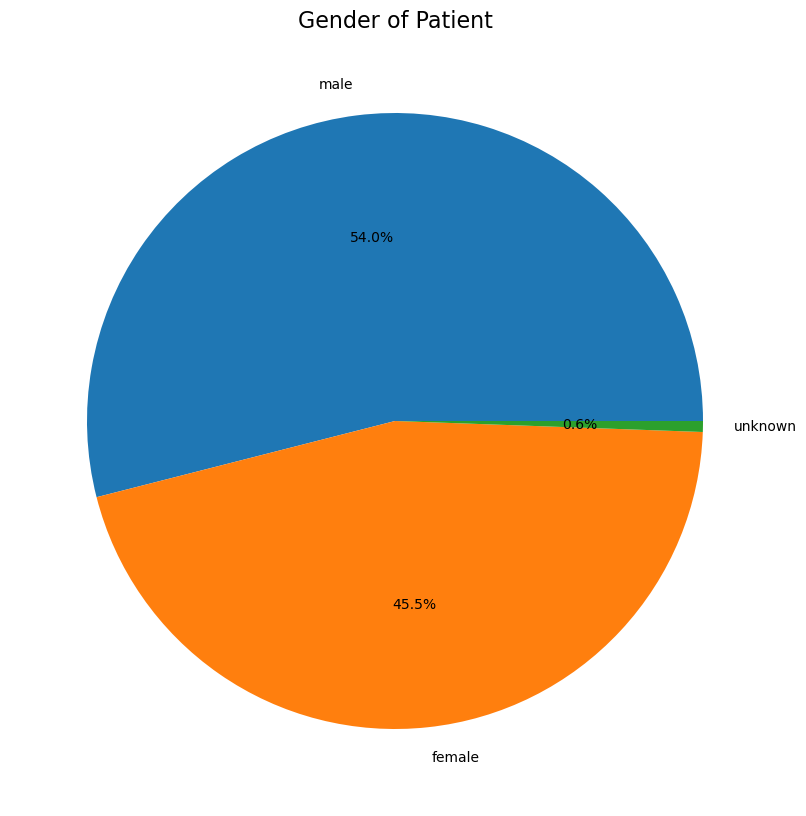

In [29]:
bar, ax = plt.subplots(figsize = (10,10))
plt.pie(tabular_data['sex'].value_counts(), labels = tabular_data['sex'].value_counts().index, autopct="%.1f%%")
plt.title('Gender of Patient', size=16)

Text(0.5, 1.0, 'Histogram of Age of Patients')

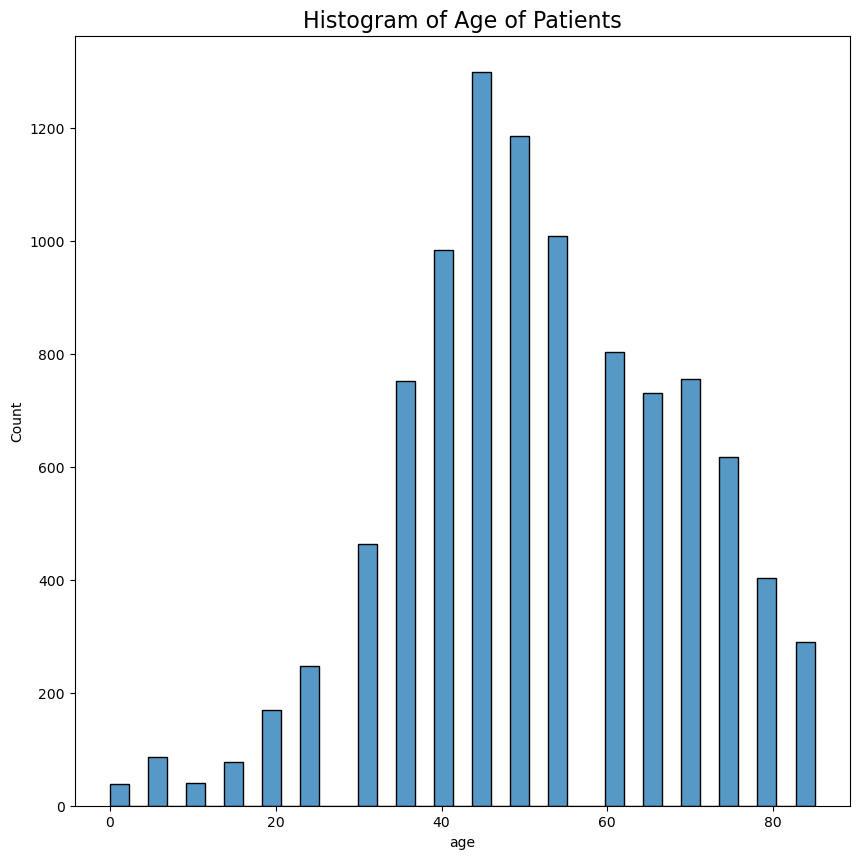

In [30]:
bar, ax = plt.subplots(figsize=(10,10))
sns.histplot(tabular_data['age'])
plt.title('Histogram of Age of Patients', size=16)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'back'),
  Text(1, 0, 'lower extremity'),
  Text(2, 0, 'trunk'),
  Text(3, 0, 'upper extremity'),
  Text(4, 0, 'abdomen'),
  Text(5, 0, 'face'),
  Text(6, 0, 'chest'),
  Text(7, 0, 'foot'),
  Text(8, 0, 'scalp'),
  Text(9, 0, 'neck'),
  Text(10, 0, 'unknown'),
  Text(11, 0, 'hand'),
  Text(12, 0, 'genital'),
  Text(13, 0, 'ear'),
  Text(14, 0, 'acral')])

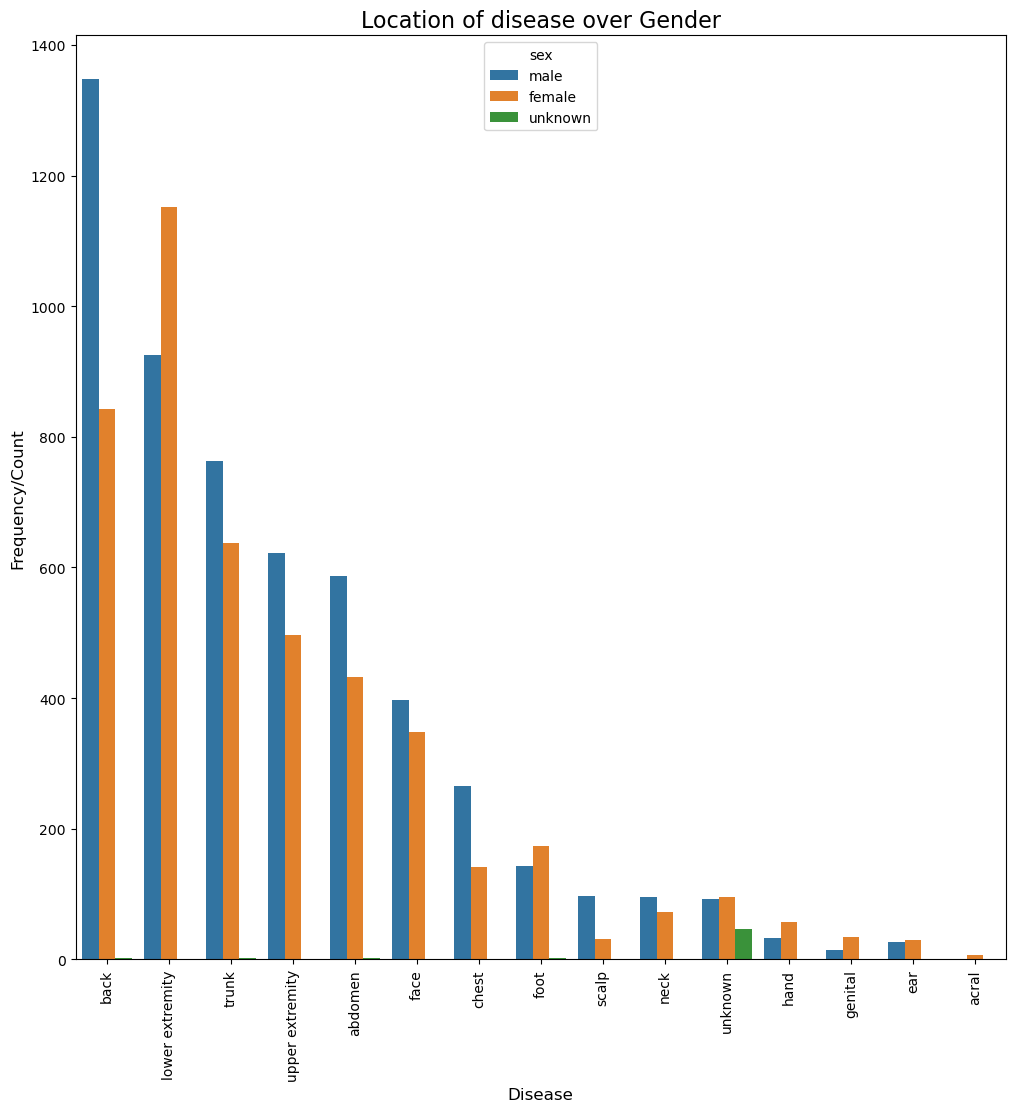

In [31]:
value = tabular_data[['localization', 'sex']].value_counts().to_frame()
value.reset_index(level=[1,0 ], inplace=True)
temp = value.rename(columns = {'localization':'location', 0: 'count'})

bar, ax = plt.subplots(figsize = (12, 12))
sns.barplot(x = 'location',  y='count', hue = 'sex', data = temp)
plt.title('Location of disease over Gender', size = 16)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency/Count', size=12)
plt.xticks(rotation = 90)

In [32]:
oversample = RandomOverSampler()
x,y  = oversample.fit_resample(x,y)

In [33]:
x = np.array(x).reshape(-1,28,28,3)
print('Shape of X :',x.shape)

Shape of X : (46935, 28, 28, 3)


In [34]:
x = (x-np.mean(x))/np.std(x)
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [35]:
model = Sequential()
model.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.summary()

C:\Users\yeshwanth\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 13, 13, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 182,663 (713.53 KB)

 Trainable params: 182,663 (713.53 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.keras',
                                              monitor='val_acc', mode='max',
                                              verbose=1)

In [37]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'adam',
              metrics = ['accuracy'])
history = model.fit(X_train,
                    Y_train,
                    validation_split=0.2,
                    batch_size = 128,
                    epochs = 20,
                    callbacks=[callback])

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.4136 - loss: 1.4793
Epoch 1: saving model to best_model.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 50s 186ms/step - accuracy: 0.4140 - loss: 1.4784 - val_accuracy: 0.6459 - val_loss: 0.9926
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.6918 - loss: 0.8477
Epoch 2: saving model to best_model.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 42s 177ms/step - accuracy: 0.6920 - loss: 0.8473 - val_accuracy: 0.7897 - val_loss: 0.6049
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.8018 - loss: 0.5486
Epoch 3: saving model to best_model.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 46s 196ms/step - accuracy: 0.8019 - loss: 0.5484 - val_accuracy: 0.8391 - val_loss: 0.4322
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - accuracy: 0.8707 - loss: 0.3661
Epoch 4: saving model to best_model.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 57s 241ms/step - accuracy: 0.8708 - loss: 0.3660 - val_accuracy: 0.8875 - val_loss: 0.3167


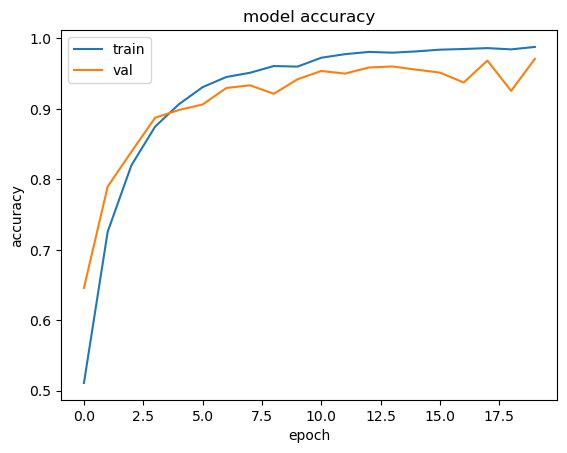

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

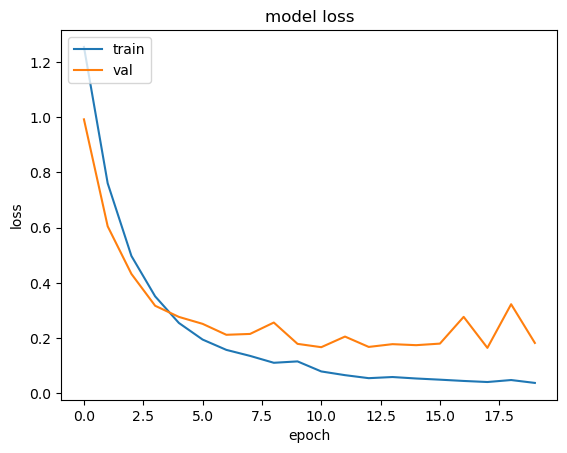

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [40]:
model.load_weights('best_model.keras')

In [41]:
loss, acc = model.evaluate(X_test, Y_test, verbose=2)

294/294 - 4s - 13ms/step - accuracy: 0.9690 - loss: 0.1670


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 18s 0us/step
Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4390 - loss: 1.4851
Epoch 1: val_accuracy improved from -inf to 0.63529, saving model to vgg19_best_model.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 482s 2s/step - accuracy: 0.4394 - loss: 1.4843 - val_accuracy: 0.6353 - val_loss: 0.9810
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6279 - loss: 1.0013
Epoch 2: val_accuracy improved from 0.63529 to 0.70719, saving model to vgg19_best_model.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 473s 2s/step - accuracy: 0.6279 - loss: 1.0011 - val_accuracy: 0.7072 - val_loss: 0.8073
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7008 - loss: 0.8255
Epoch 3: val_accuracy improved from 0.70719 to 0.75486, saving model to vgg19_best_model.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 467s 2s/step - accuracy: 0.7008 - loss: 0.8255 - val_accuracy: 0.7549 - val_loss: 0.6931
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy

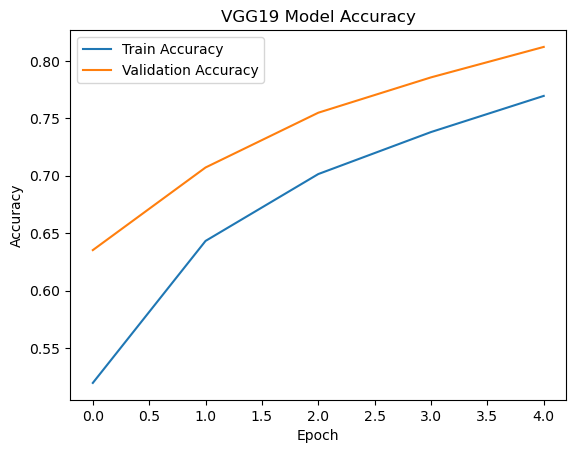

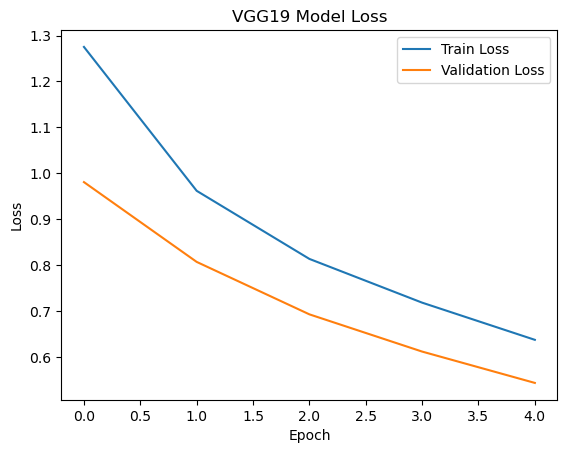

294/294 - 127s - 432ms/step - accuracy: 0.8042 - loss: 0.5529
VGG19 Test Accuracy: 0.8042, Test Loss: 0.5529


In [42]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import matplotlib.pyplot as plt

# Resize X_train and X_test to 32x32
X_train_resized = tf.image.resize(X_train, (32, 32))
X_test_resized = tf.image.resize(X_test, (32, 32))

# VGG19 Model
def create_vgg19_model(input_shape, num_classes):
    vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in vgg_base.layers:
        layer.trainable = False  # Freeze VGG19 layers for transfer learning

    model = Sequential([
        vgg_base,
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Prepare the VGG19 model
input_shape = (32, 32, 3)  # Updated input shape
num_classes = 7
vgg19_model = create_vgg19_model(input_shape, num_classes)

# Compile the model
vgg19_model.compile(optimizer=Adam(learning_rate=0.001),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint(filepath='vgg19_best_model.keras', monitor='val_accuracy', save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Train the model
history_vgg = vgg19_model.fit(
    X_train_resized, Y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=128,
    callbacks=[checkpoint, early_stopping]
)

# Plot Accuracy and Loss Curves for VGG19
plt.figure()
plt.plot(history_vgg.history['accuracy'], label='Train Accuracy')
plt.plot(history_vgg.history['val_accuracy'], label='Validation Accuracy')
plt.title('VGG19 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(history_vgg.history['loss'], label='Train Loss')
plt.plot(history_vgg.history['val_loss'], label='Validation Loss')
plt.title('VGG19 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Load the best model and evaluate
vgg19_model.load_weights('vgg19_best_model.keras')
vgg_loss, vgg_acc = vgg19_model.evaluate(X_test_resized, Y_test, verbose=2)
print(f"VGG19 Test Accuracy: {vgg_acc:.4f}, Test Loss: {vgg_loss:.4f}")
